# 深度卷积神经网络（AlexNet）



In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [1]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10))

我们构造一个
单通道数据，来观察每一层输出的形状

In [2]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

Fashion-MNIST图像的分辨率
低于ImageNet图像。
我们将它们增加到$224 \times 224$

In [5]:
d2l.load_data_fashion_mnist??

Signature: d2l.load_data_fashion_mnist(batch_size, resize=None)
Source:   
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory.

    Defined in :numref:`sec_utils`"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (torch.utils.data.DataLoader(mnist_train, batch_size, shuffle=True,
                                        num_workers=get_dataloader_workers()),
            torch.utils.data.DataLoader(mnist_test, batch_size, shuffle=False,
                                        num_workers=get_dataloader_workers()))
File:      ~/d2l/.venv/lib/python3.11/site-packages/d2l/torch.

In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

训练AlexNet

野兽模式：CPU 60W，温度95℃；GPU 75W，温度58℃；时间6min57.3s

loss 0.329, train acc 0.880, test acc 0.880
1616.2 examples/sec on cuda:0


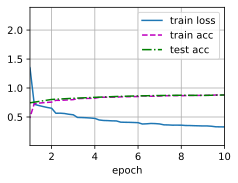

In [4]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

均衡模式（最佳能效）：
CPU 38W，温度72℃；GPU 75W，温度58℃；时间 7min3.9s

loss 0.327, train acc 0.879, test acc 0.882
1601.9 examples/sec on cuda:0


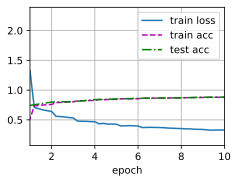

In [6]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10))

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

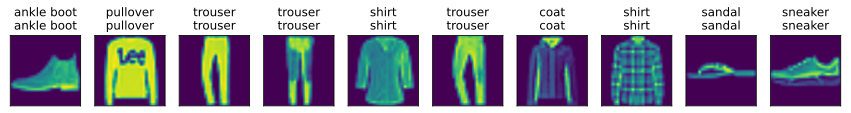

In [11]:
from torchvision.transforms import Resize

def predict_ch6(net, test_iter, n=6):  
    for X, y in test_iter:
        break
    X = Resize(224)(X)
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net.to('cpu')(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 224, 224)), 1, n, titles=titles[0:n])

predict_ch6(net, test_iter, 10)

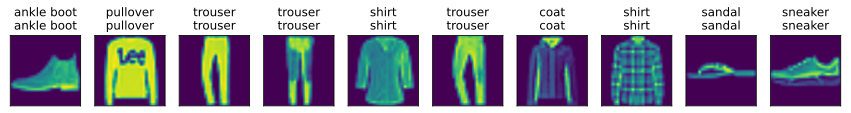

In [23]:
def predict_ch6(net, test_iter, n=6, device='cpu'):
    for X, y in test_iter:
        X, y = X.to(device), y.to(device)
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net.to(device)(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].to('cpu').reshape((n, 224, 224)), 1, n, titles=titles[0:n])

predict_ch6(net, test_iter, 10, d2l.try_gpu())

In [19]:
for X, y in test_iter:
    X, y = X.to('cuda'), y.to('cuda')
    break

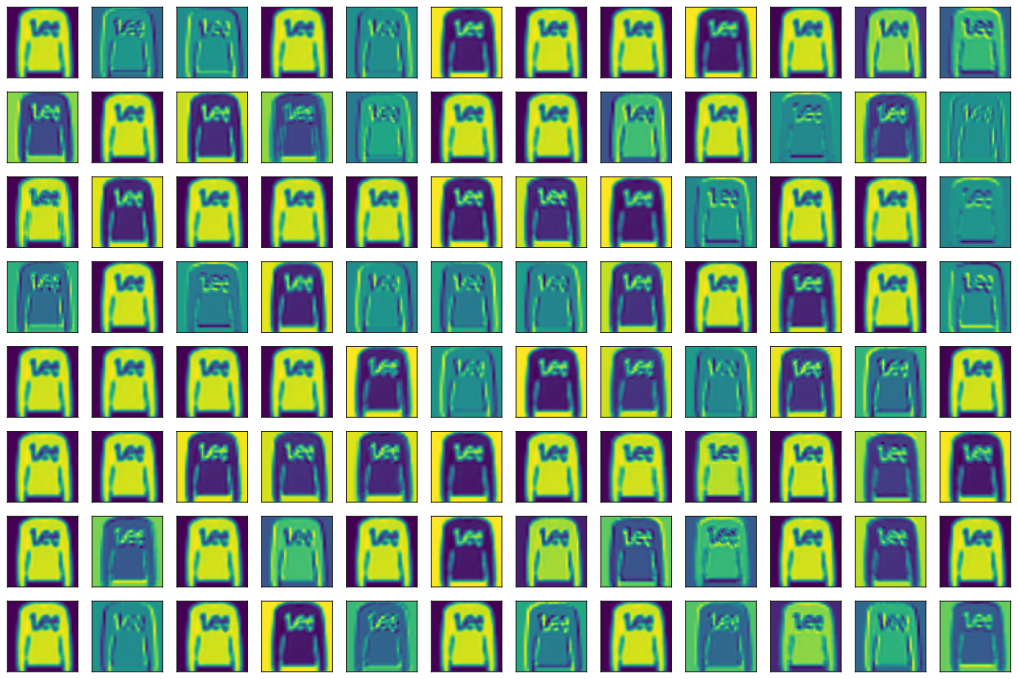

In [28]:
d2l.show_images(net[0](X[1]).to('cpu'), 8, 12);

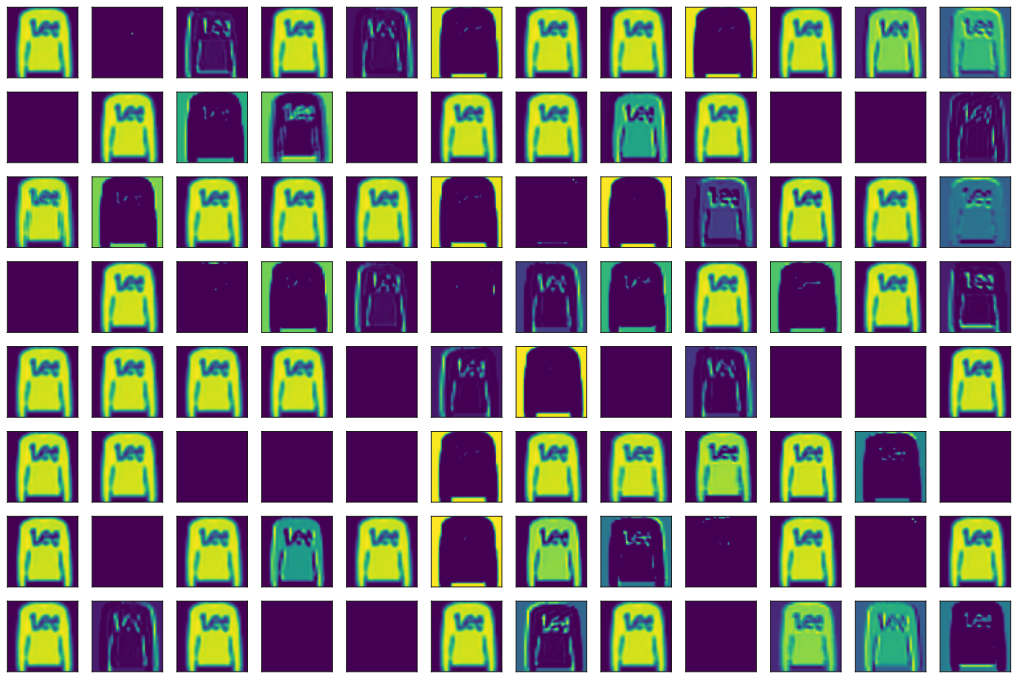

In [30]:
d2l.show_images(net[0:2](X[1]).to('cpu'), 8, 12);

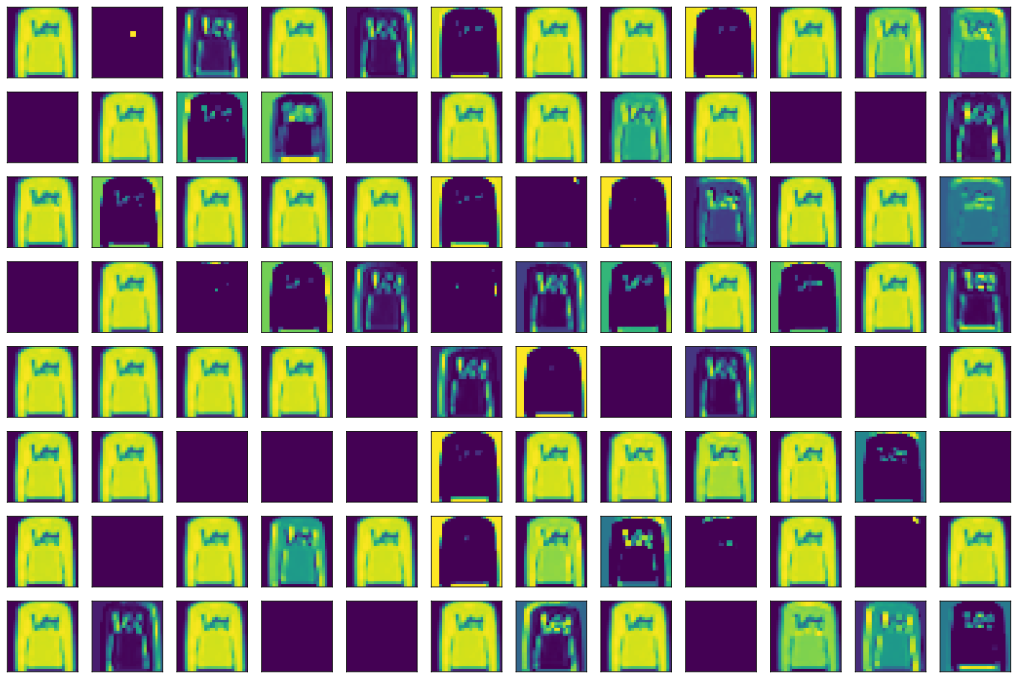

In [32]:
d2l.show_images(net[0:3](X[1]).to('cpu'), 8, 12);

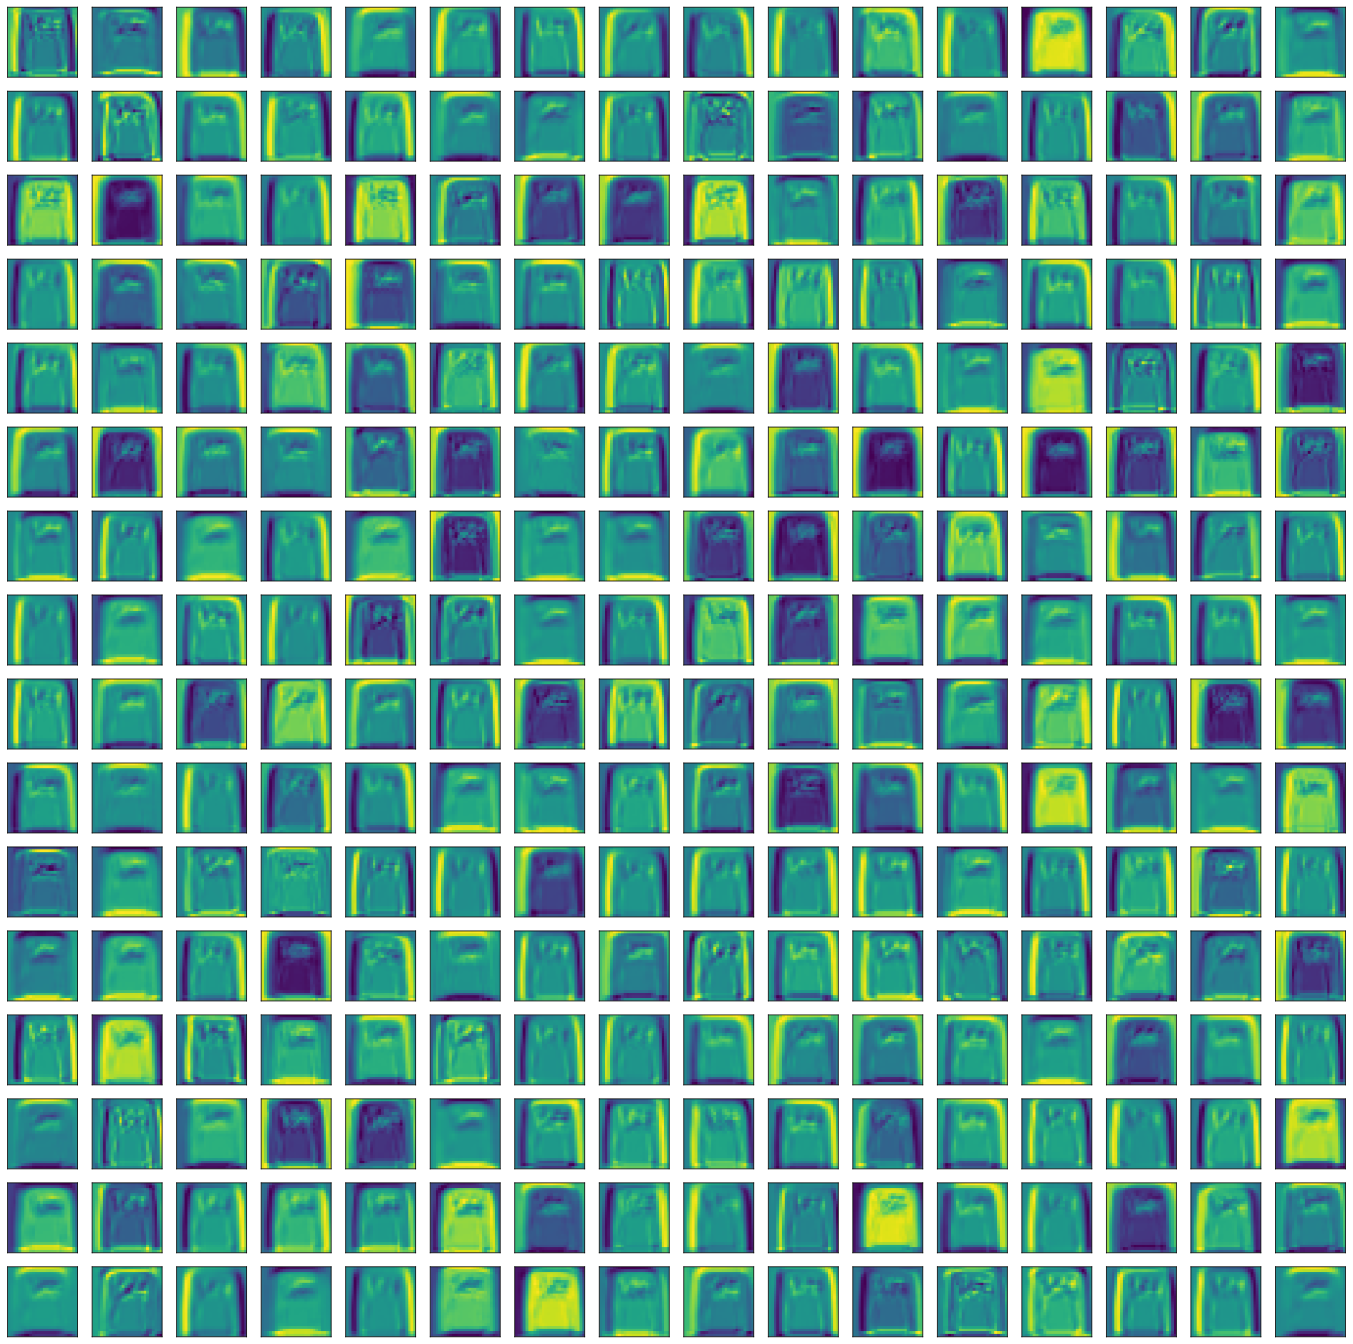

In [33]:
d2l.show_images(net[0:4](X[1]).to('cpu'), 16, 16);

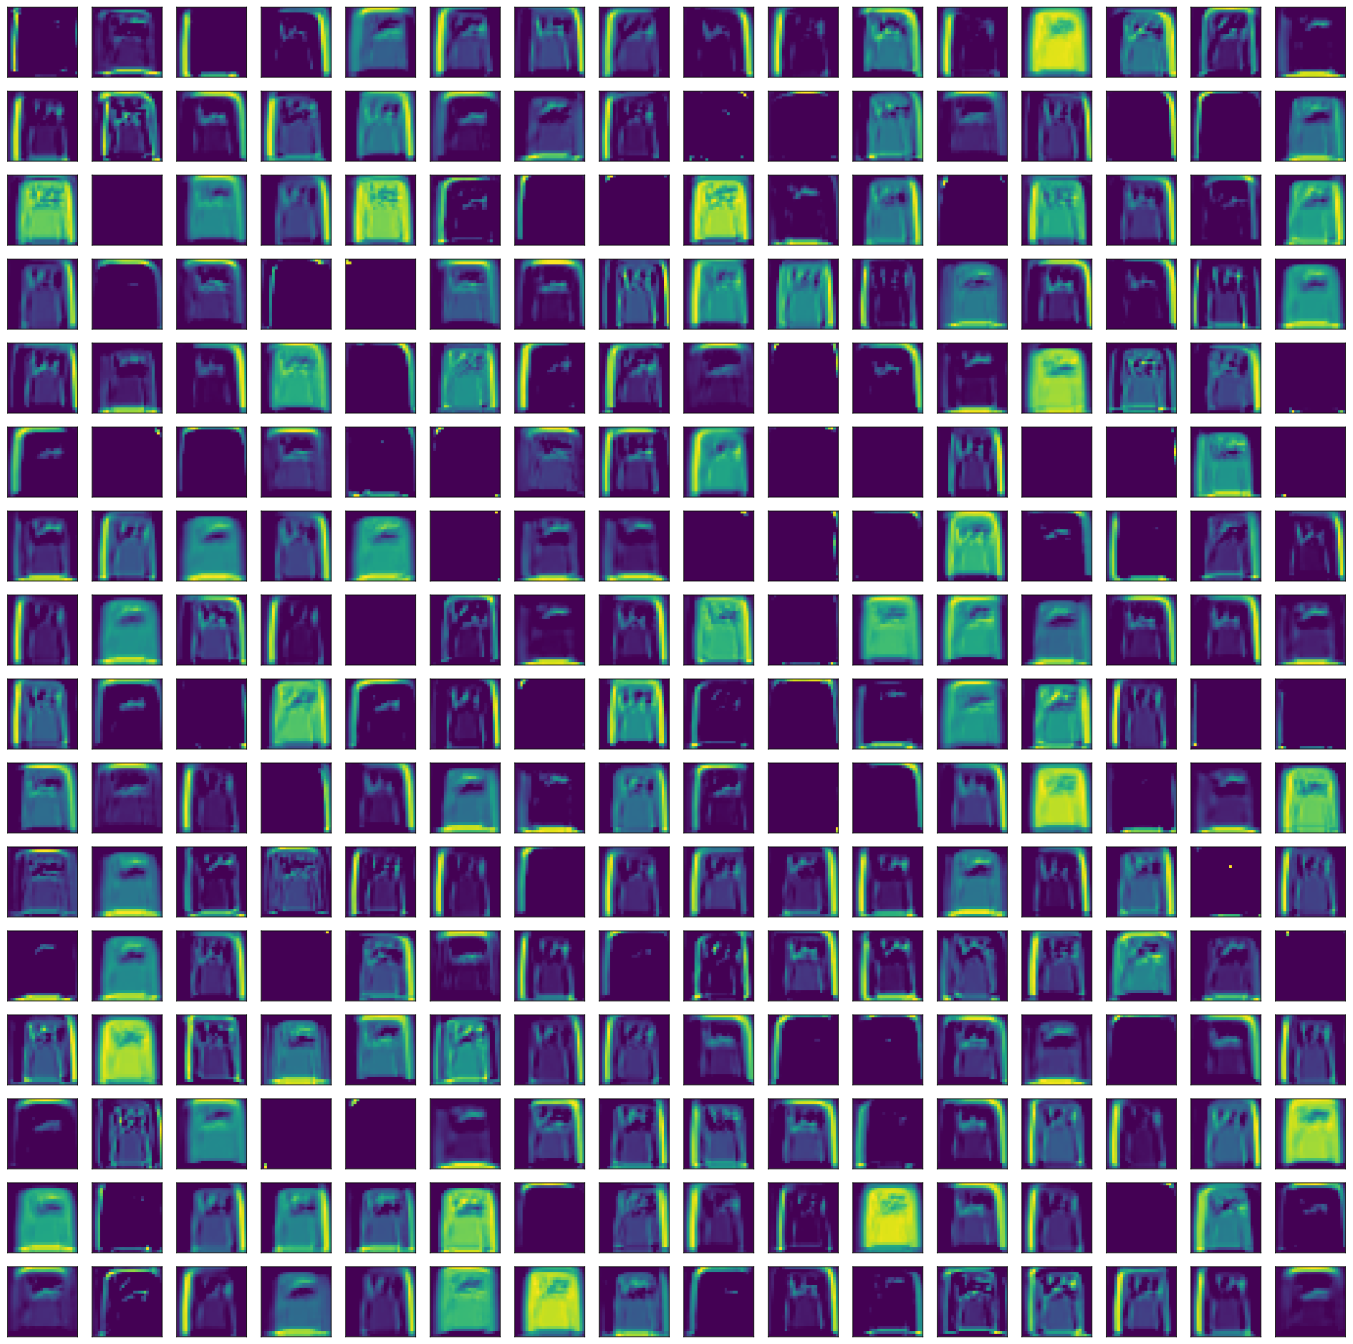

In [34]:
d2l.show_images(net[0:5](X[1]).to('cpu'), 16, 16);

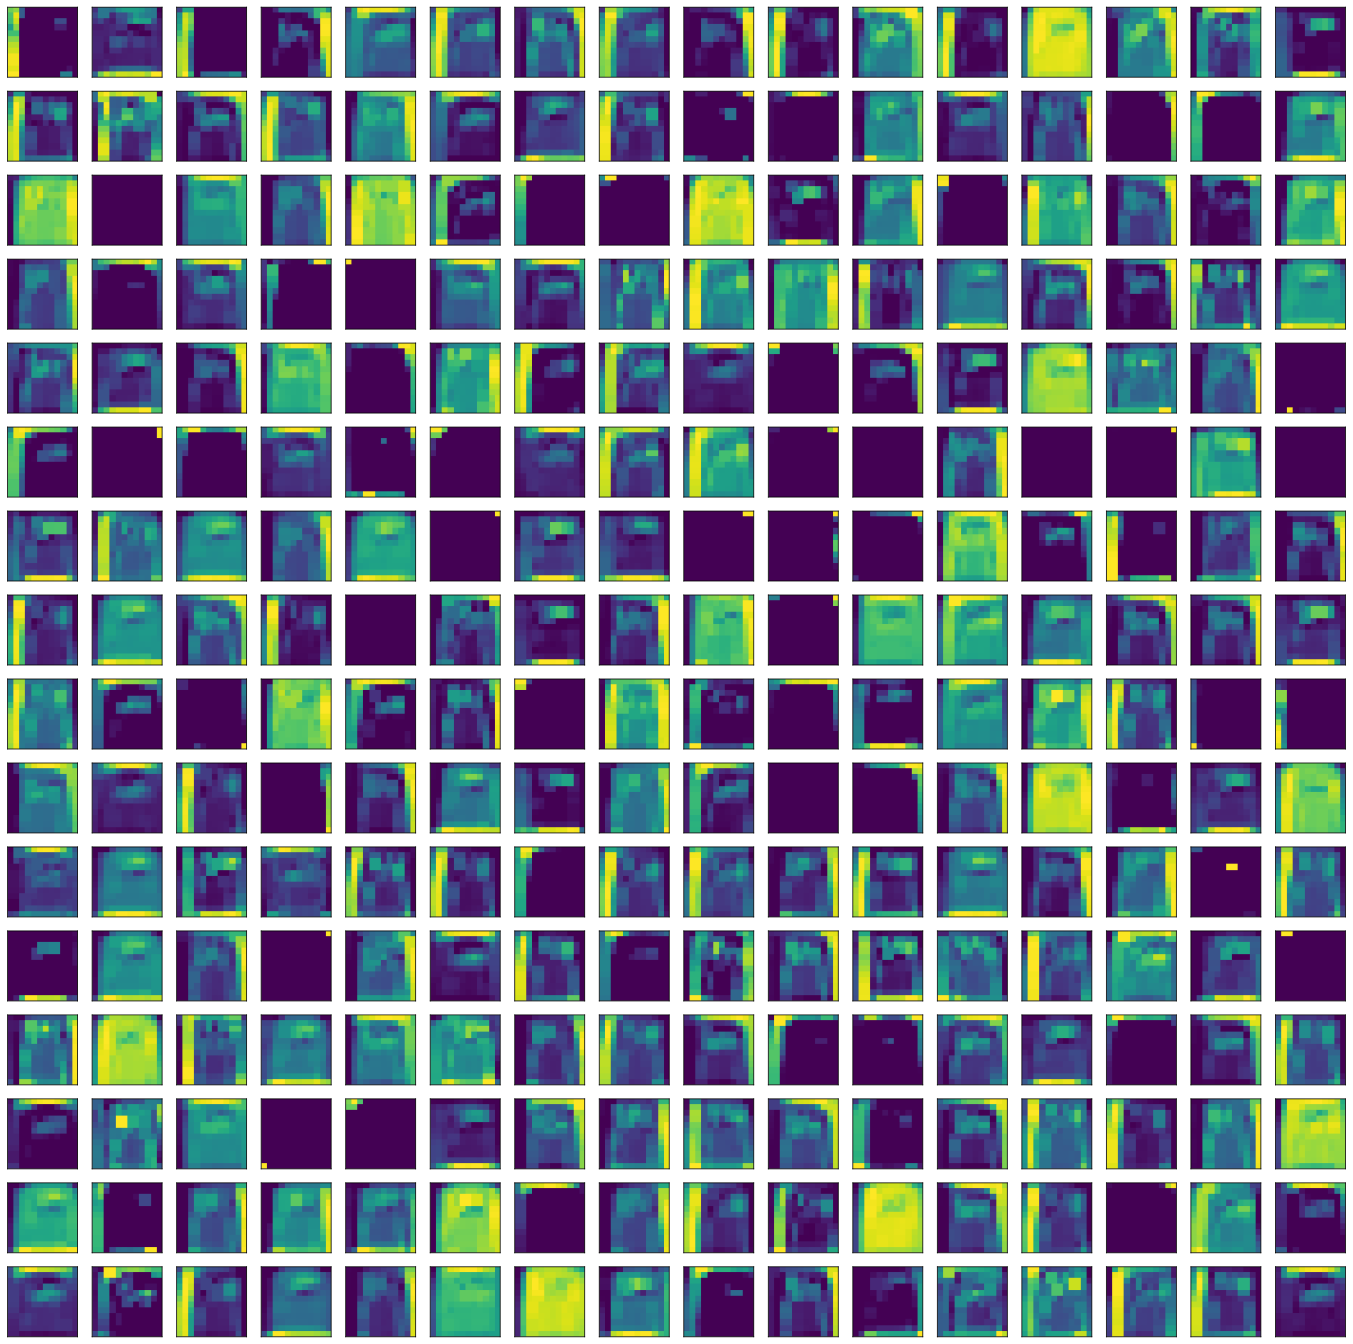

In [35]:
d2l.show_images(net[0:6](X[1]).to('cpu'), 16, 16);

使用 `torchvision.models.AlexNet` 预定义的网络（稍作修改）

loss 0.349, train acc 0.873, test acc 0.875
1827.4 examples/sec on cuda:0


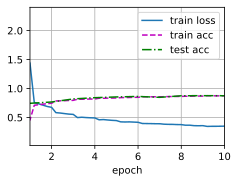

In [37]:
net_in_torchvision = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(64, 192, kernel_size=5, padding=2),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(192, 384, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(256, 256, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.AdaptiveAvgPool2d((6, 6)),
    nn.Flatten(),
    nn.Dropout(p=0.5),
    nn.Linear(256 * 6 * 6, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=True),
    nn.Linear(4096, 10),
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net_in_torchvision, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 练习

AlexNet对Fashion-MNIST数据集来说可能太复杂了。

1. 尝试简化模型以加快训练速度，同时确保准确性不会显著下降。

2. 设计一个更好的模型，可以直接在 $28\times28$ 图像上工作。

In [2]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

loss 0.397, train acc 0.856, test acc 0.861
8156.2 examples/sec on cuda:0


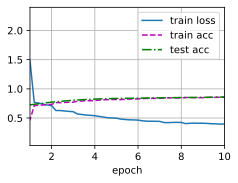

In [41]:
net1 = nn.Sequential(
  nn.Conv2d(1, 64, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(64, 192, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(192, 192, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(192, 96, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(96*7*7, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net1, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.496, train acc 0.815, test acc 0.829
13693.8 examples/sec on cuda:0


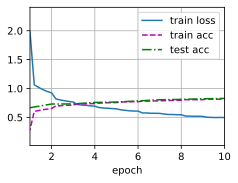

In [43]:
net2 = nn.Sequential(
  nn.Conv2d(1, 64, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(64, 192, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(192, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(256, 192, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(192*3*3, 1024), nn.ReLU(), nn.Dropout(),
  nn.Linear(1024, 512), nn.ReLU(), nn.Dropout(),
  nn.Linear(512, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net2, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.465, train acc 0.827, test acc 0.833
7682.8 examples/sec on cuda:0


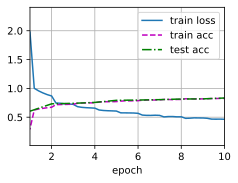

In [45]:
net3 = nn.Sequential(
  nn.Conv2d(1, 96, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(96, 256, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*3*3, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net3, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.458, train acc 0.829, test acc 0.833
7530.0 examples/sec on cuda:0


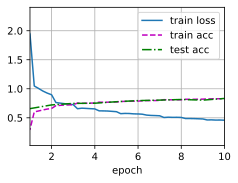

In [47]:
net4 = nn.Sequential(
  nn.Conv2d(1, 96, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(3, stride=2, padding=1),
  nn.Conv2d(96, 256, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(3, stride=2, padding=1),
  nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(3, stride=2, padding=1),
  nn.Flatten(),
  nn.Linear(256*3*3, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net4, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.399, train acc 0.853, test acc 0.851
2767.2 examples/sec on cuda:0


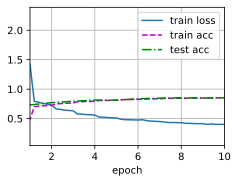

In [48]:
net5 = nn.Sequential(
  nn.Conv2d(1, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*7*7, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net5, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.404, train acc 0.851, test acc 0.856
2345.2 examples/sec on cuda:0


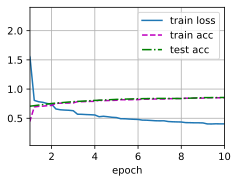

In [51]:
net6 = nn.Sequential(
  nn.Conv2d(1, 96, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(96, 256, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 2048), nn.ReLU(), nn.Dropout(),
  nn.Linear(2048, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net6, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.368, train acc 0.864, test acc 0.866
1735.8 examples/sec on cuda:0


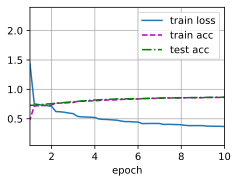

In [52]:
net7 = nn.Sequential(
  nn.Conv2d(1, 96, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(96, 256, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net7, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.376, train acc 0.861, test acc 0.867
1455.9 examples/sec on cuda:0


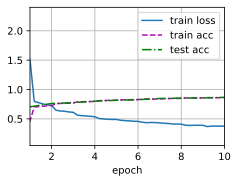

In [3]:
net7 = nn.Sequential(
  nn.Conv2d(1, 96, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(96, 256, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net7, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.395, train acc 0.853, test acc 0.856
2013.8 examples/sec on cuda:0


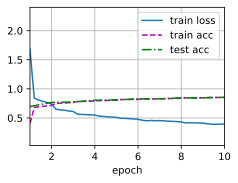

In [6]:
net = nn.Sequential(
  nn.Conv2d(1, 96, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(3, stride=1),
  nn.Conv2d(96, 256, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(3, stride=2),
  nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(3, stride=2),
  nn.Flatten(),
  nn.Linear(256*5*5, 4096), nn.ReLU(), nn.Dropout(),
  nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(),
  nn.Linear(4096, 10)


lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.367, train acc 0.864, test acc 0.862
1344.6 examples/sec on cuda:0


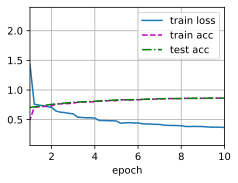

In [7]:
net = nn.Sequential(
  nn.Conv2d(1, 192, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(192, 256, kernel_size=3), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.354, train acc 0.869, test acc 0.872
918.7 examples/sec on cuda:0


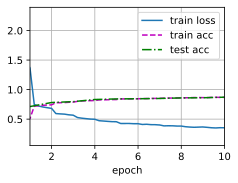

In [3]:
net = nn.Sequential(
  nn.Conv2d(1, 192, kernel_size=7, padding=3), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(192, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [7]:
torch.cuda.empty_cache()

loss 0.351, train acc 0.872, test acc 0.863
923.1 examples/sec on cuda:0


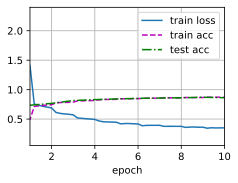

In [9]:
net = nn.Sequential(
  nn.Conv2d(1, 192, kernel_size=11, padding=5), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(192, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.344, train acc 0.872, test acc 0.869
595.0 examples/sec on cuda:0


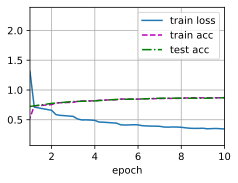

In [10]:
net = nn.Sequential(
  nn.Conv2d(1, 192, kernel_size=7, padding=3), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(192, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 512, kernel_size=5, padding=2), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=5, padding=2), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.440, train acc 0.842, test acc 0.853
1069.9 examples/sec on cuda:0


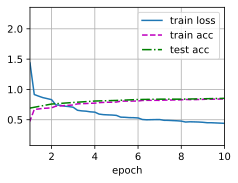

In [13]:
net = nn.Sequential(
  nn.Conv2d(1, 192, kernel_size=11, padding=5), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(192, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 512), nn.ReLU(), nn.Dropout(),
  nn.Linear(512, 128), nn.ReLU(), nn.Dropout(),
  nn.Linear(128, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.496, train acc 0.820, test acc 0.845
1923.7 examples/sec on cuda:0


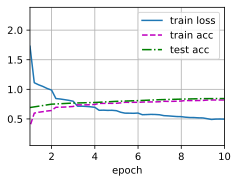

In [12]:
net = nn.Sequential(
  nn.Conv2d(1, 96, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(3, stride=1, padding=1),
  nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(3, stride=2),
  nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 128, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(3, stride=2),
  nn.Flatten(),
  nn.Linear(128*6*6, 256), nn.ReLU(), nn.Dropout(),
  nn.Linear(256, 64), nn.ReLU(), nn.Dropout(),
  nn.Linear(64, 10)
)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

最佳结果：

loss 0.187, train acc 0.930, test acc 0.907
918.8 examples/sec on cuda:0


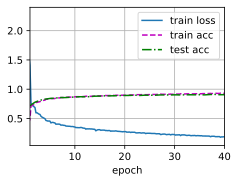

In [14]:
net = nn.Sequential(
  nn.Conv2d(1, 192, kernel_size=7, padding=3), nn.ReLU(),
  nn.MaxPool2d(2, stride=1),
  nn.Conv2d(192, 256, kernel_size=5, padding=2), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Flatten(),
  nn.Linear(256*6*6, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 8192), nn.ReLU(), nn.Dropout(),
  nn.Linear(8192, 10)
)

lr, num_epochs = 0.01, 40
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

过拟合了？